In [1]:
# Basic packages
import numpy as np
import pandas as pd
import random as rd
import datetime
# Viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 1. IMPORT DATASET

In [2]:
import os

os.getcwd()

'/Users/nurulsriandaputri/Documents/Kuliah/2.lomba,training/10.gemastik/powerpuff-girlz/titanic'

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
whole_df = pd.concat([train,test])

## 2. MELIHAT DATA & DATASET (EDA)

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  train_test  
0      0         A/5 21171   7.2500   NaN        S           1  
1      0          PC 17599  71.2833   C85        C           1  
2      0  STON/O2. 3101282   7.9250   NaN        S           1  
3      0            113803  53.1000  C123        S           1  
4      0            373450   8.0500   NaN        S           1

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
train_test       int64
dtype: object

### Dari keterangan lomba diketahui:
pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

In [6]:
train.shape

(891, 13)

In [7]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  train_test  
count  891.000000  891.000000       891.0  
mean     0.381594   32.204208         1.0  
std      0.806057   49.693429         0.0  
min      0.000000    0.000000         1.0  
25%      0.000000    7.910400         1.0  
50%      0.000000   14.454200         1.0  
75%      0.000000   31.000000         1.0  
max      6.000000  512.329200         1.0

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  train_test   418 non-null    int64  
 12  Survived     0 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 42.6+ KB


In [10]:
train.select_dtypes(include=['int','float']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

## 3. MELIHAT PERSEBARAN DATA (W/ VISUALIZATION)
Beberapa poin penting:
- Conditional subsetting: **```df[df['column_name']=='condition']```**

contoh: rice[(rice['quantity']<5) & (rice['format']=='supermarket')]

In [11]:
df_plot = train[train.describe().columns]
sns.pairplot(df_plot)

**Dari bentuk persebarannya, dapat dilihat kita tidak bisa menggunakan model yang linear**

In [12]:
plt.figure(figsize=(30,10))
chart = sns.barplot(train['Cabin'].value_counts().index,train['Cabin'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

/Users/nurulsriandaputri/Documents/Kuliah/2.lomba,training/10.gemastik/gemastikenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'C23 C25 C27'),
 Text(1, 0, 'B96 B98'),
 Text(2, 0, 'G6'),
 Text(3, 0, 'E101'),
 Text(4, 0, 'D'),
 Text(5, 0, 'C22 C26'),
 Text(6, 0, 'F33'),
 Text(7, 0, 'F2'),
 Text(8, 0, 'B20'),
 Text(9, 0, 'C68'),
 Text(10, 0, 'B22'),
 Text(11, 0, 'D20'),
 Text(12, 0, 'E121'),
 Text(13, 0, 'D35'),
 Text(14, 0, 'B5'),
 Text(15, 0, 'B28'),
 Text(16, 0, 'C123'),
 Text(17, 0, 'B58 B60'),
 Text(18, 0, 'D33'),
 Text(19, 0, 'F G73'),
 Text(20, 0, 'C125'),
 Text(21, 0, 'E24'),
 Text(22, 0, 'C52'),
 Text(23, 0, 'B51 B53 B55'),
 Text(24, 0, 'E67'),
 Text(25, 0, 'C126'),
 Text(26, 0, 'E33'),
 Text(27, 0, 'F4'),
 Text(28, 0, 'B18'),
 Text(29, 0, 'D26'),
 Text(30, 0, 'C83'),
 Text(31, 0, 'B49'),
 Text(32, 0, 'B57 B59 B63 B66'),
 Text(33, 0, 'E8'),
 Text(34, 0, 'E44'),
 Text(35, 0, 'D36'),
 Text(36, 0, 'E25'),
 Text(37, 0, 'C65'),
 Text(38, 0, 'C2'),
 Text(39, 0, 'C93'),
 Text(40, 0, 'C124'),
 Text(41, 0, 'C92'),
 Text(42, 0, 'D17'),
 Text(43, 0, 'B35'),
 Text(44, 0, 'B77'),
 Text(45, 0, 'C78'),
 Tex

/Users/nurulsriandaputri/Documents/Kuliah/2.lomba,training/10.gemastik/gemastikenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '1601'),
 Text(1, 0, '347082'),
 Text(2, 0, 'CA. 2343'),
 Text(3, 0, '3101295'),
 Text(4, 0, 'CA 2144'),
 Text(5, 0, '347088'),
 Text(6, 0, 'S.O.C. 14879'),
 Text(7, 0, '382652'),
 Text(8, 0, '19950'),
 Text(9, 0, '347077'),
 Text(10, 0, '2666'),
 Text(11, 0, 'PC 17757'),
 Text(12, 0, 'W./C. 6608'),
 Text(13, 0, '349909'),
 Text(14, 0, '17421'),
 Text(15, 0, 'LINE'),
 Text(16, 0, '113781'),
 Text(17, 0, '4133'),
 Text(18, 0, '113760'),
 Text(19, 0, '230080'),
 Text(20, 0, 'C.A. 34651'),
 Text(21, 0, 'PC 17760'),
 Text(22, 0, '363291'),
 Text(23, 0, 'PC 17572'),
 Text(24, 0, '35273'),
 Text(25, 0, '29106'),
 Text(26, 0, '13502'),
 Text(27, 0, '371110'),
 Text(28, 0, '347742'),
 Text(29, 0, '110413'),
 Text(30, 0, '248727'),
 Text(31, 0, '110152'),
 Text(32, 0, 'PC 17582'),
 Text(33, 0, 'C.A. 31921'),
 Text(34, 0, '345773'),
 Text(35, 0, '239853'),
 Text(36, 0, 'SC/Paris 2123'),
 Text(37, 0, '24160'),
 Text(38, 0, 'PC 17755'),
 Text(39, 0, 'F.C.C. 13529'),
 Text(40, 0, '35858

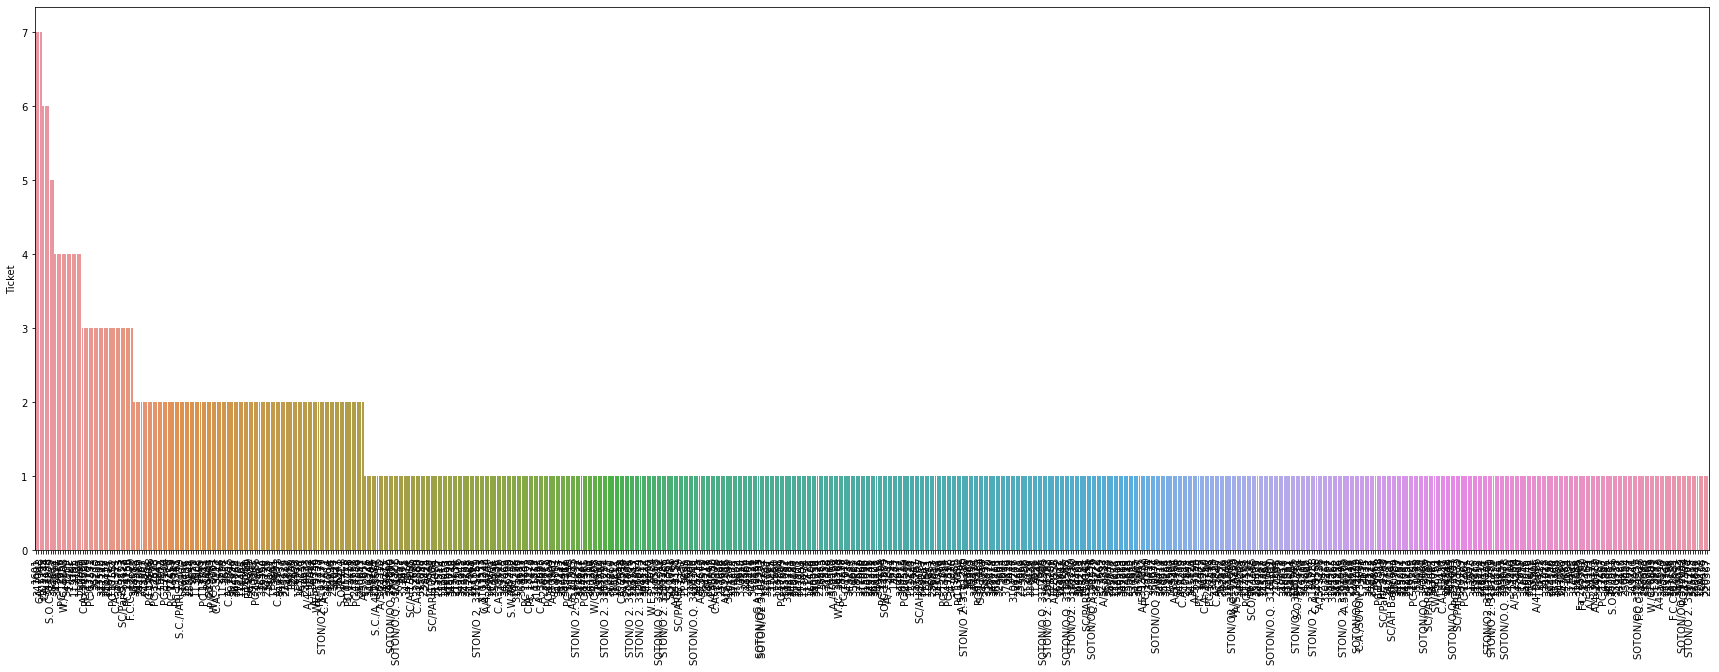

In [13]:
plt.figure(figsize=(30,10))
chart = sns.barplot(train['Ticket'].value_counts().index,train['Ticket'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# 4. FEATURE ENGINEERING

### Mengubah datatype
contoh penggunaan:
- df[['format','sub_category','yearmonth','category']] = df[['format','sub_category','yearmonth','category']].astype('category') 

- df['purchase_time'] = df['purchase_time'].astype('datetime64')
- df['unit_sold'] = df['unit_sold'].astype('int64')

### Menangani kolom yang TIDAK bertipe category seharusnya bertipe category
- Mengubah kolom menjadi type `category`

### Menangani kolom yang bertipe category
- Drop kolom yang tidak relevan untuk prediksi: df.drop(columns=['receipt_id','purchase_time'])
- Label encoding
- One-hot encoding
- Mean Encoding

### Mengubah value (dengan regex) -> 
- biasanya untuk value-value yang awalnya punya format tertentu, seperti currency $3,780.50 (object) -> 3780.5
contoh:
- df['harga'] = df['harga'].str.replace(....)
- df['judul'] = df['judul'].lower()

### Mengekstrak data bertipe datetime
- `household['purchase_time'].dt.month`
- `household['purchase_time'].dt.month_name()`
- `household['purchase_time'].dt.year`
- `household['purchase_time'].dt.day`
- `household['purchase_time'].dt.dayofweek`
- `household['purchase_time'].dt.hour`
- `household['purchase_time'].dt.day_name()`

menjadikan timestamp/datetime menjadi periode tertentu:

- `household['purchase_time'].dt.to_period('D')`
- `household['purchase_time'].dt.to_period('W')`
- `household['purchase_time'].dt.to_period('M')`
- `household['purchase_time'].dt.to_period('Q')`

### Menangani missing value
untuk tiap kolom, dapat dicek seperti berikut: `household2['weekday'].isna()`, `household2[household2['weekday'].notna()]`

- Drop row yang terlalu banyak missing value : 
    - `household2.dropna(thresh = 6)` # NA in 6 columns ->  thresh: threshold
    - `household2.dropna(how='all')` # buang semua yang semua kolom NA
    - `household2.dropna(how='any')` # buang data yg ada kolom yang NA (minimal 1 kosong)
- Mengisi dengan mean, median, modus
- Interpolasi
- fill dengan value tertentu
    - household3[['category', 'format','discount']] = household3[['category', 'format','discount']].fillna('Missing')
    - household3.unit_price = household3.unit_price.fillna(0)
    - household3.purchase_time = household3.fillna(method='bfill') -> backfill
    - household3.weekday = household3.purchase_time.dt.day_name()
    - household3.quantity = household3.quantity.replace(np.nan, -1)

### Duplicated Data
- cek yang data tanpa duplikat: household3[household3.duplicated(keep=False)]
- drop yang duplikat : 
    - household3.drop_duplicates()
    - household3.drop_duplicates(keep="first")

In [14]:
# create all categorical variables to whole_df 
# later we can divide the training and testing set with the help of train_test columns

# jumlah cabin
whole_df['cabin_multiple'] = whole_df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

# huruf depan cabin? semacam kode
whole_df['cabin_adv'] = whole_df.Cabin.apply(lambda x: str(x)[0])

# apakah ticket numerik?
whole_df['numeric_ticket'] = whole_df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

# ticket yang ada letter, ambil kata pertamanya
whole_df['ticket_letters'] = whole_df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

# ambil gelar penumpang
whole_df['name_title'] = whole_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [15]:
whole_df.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  train_test  \
0      0         A/5 21171   7.2500   NaN        S           1   
1      0          PC 17599  71.2833   C85        C           1   
2      0  STON/O2. 3101282   7.9250   NaN        S           1   
3      0            113803  53.1000  C123        S           1   
4      0            373450   8.0500   NaN        S           1   

   cabin_multiple cabin_adv  numeric_ticket ticket_letters name_title  
0               0         n               0             a5         Mr  
1               1         C               0             pc        Mrs  
2               0         n               0         stono2       Miss  
3               1         C               1              0        Mrs  
4               0         n               1              0         Mr

In [16]:
# filling null values with median
whole_df.Age = whole_df.Age.fillna(train.Age.median())
whole_df.Fare = whole_df.Fare.fillna(train.Fare.median())

# drop null. 2 instances of this in training and 0 in test 
whole_df.dropna(subset=['Embarked'],inplace = True)

# The reason we are applying log to the columns below because, 
# after we applied log the dustribution was changed near to normal distribution
whole_df['norm_sibsp'] = np.log(whole_df.SibSp+1)

# log norm of fare (used)
whole_df['norm_fare'] = np.log(whole_df.Fare+1)

In [17]:
whole_df.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  train_test  \
0      0         A/5 21171   7.2500   NaN        S           1   
1      0          PC 17599  71.2833   C85        C           1   
2      0  STON/O2. 3101282   7.9250   NaN        S           1   
3      0            113803  53.1000  C123        S           1   
4      0            373450   8.0500   NaN        S           1   

   cabin_multiple cabin_adv  numeric_ticket ticket_letters name_title  \
0               0         n               0             a5         Mr   
1               1         C               0             pc        Mrs   
2               0         n               0         stono2       Miss   
3               1         C               1              0        Mrs   
4               0         n               1              0         Mr   

   norm_sibsp  norm_fare  
0    0.693147   2.110213  
1    0.693147   4.280593  
2    0.000000   2.188856  
3    0.693147   3.990834  
4    0.000000   2.202765

In [18]:
# converted fare to category for pd.get_dummies()

whole_df.Pclass = whole_df.Pclass.astype('category')

#created dummy variables from categories (also can use OneHotEncoder)
whole_dummies = pd.get_dummies(whole_df[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

In [19]:
whole_dummies.head()

Age  SibSp  Parch  norm_fare  cabin_multiple  numeric_ticket  train_test  \
0  22.0      1      0   2.110213               0               0           1   
1  38.0      1      0   4.280593               1               0           1   
2  26.0      0      0   2.188856               0               0           1   
3  35.0      1      0   3.990834               1               1           1   
4  35.0      0      0   2.202765               0               1           1   

   Pclass_1  Pclass_2  Pclass_3  ...  name_title_Master  name_title_Miss  \
0         0         0         1  ...                  0                0   
1         1         0         0  ...                  0                0   
2         0         0         1  ...                  0                1   
3         1         0         0  ...                  0                0   
4         0         0         1  ...                  0                0   

   name_title_Mlle  name_title_Mme  name_title_Mr  name_title_Mrs  \
0                0               0              1               0   
1                0               0              0               1   
2                0               0              0               0   
3                0               0              0               1   
4                0               0              1               0   

   name_title_Ms  name_title_Rev  name_title_Sir  name_title_the Countess  
0              0               0               0                        0  
1              0               0               0                        0  
2              0               0               0                        0  
3              0               0               0                        0  
4              0               0               0                        0  

[5 rows x 42 columns]

In [20]:
whole_dummies.dtypes

Age                        float64
SibSp                        int64
Parch                        int64
norm_fare                  float64
cabin_multiple               int64
numeric_ticket               int64
train_test                   int64
Pclass_1                     uint8
Pclass_2                     uint8
Pclass_3                     uint8
Sex_female                   uint8
Sex_male                     uint8
Embarked_C                   uint8
Embarked_Q                   uint8
Embarked_S                   uint8
cabin_adv_A                  uint8
cabin_adv_B                  uint8
cabin_adv_C                  uint8
cabin_adv_D                  uint8
cabin_adv_E                  uint8
cabin_adv_F                  uint8
cabin_adv_G                  uint8
cabin_adv_T                  uint8
cabin_adv_n                  uint8
name_title_Capt              uint8
name_title_Col               uint8
name_title_Don               uint8
name_title_Dona              uint8
name_title_Dr       

In [21]:
#Split to train test again

X_train = whole_dummies[whole_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = whole_dummies[whole_dummies.train_test == 0].drop(['train_test'], axis =1)

y_train = whole_df[whole_df.train_test==1].Survived

### Scale data train & data test

In [22]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

whole_dummies_scaled = whole_dummies.copy()
whole_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(whole_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
whole_dummies_scaled

X_train_scale = whole_dummies_scaled[whole_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scale = whole_dummies_scaled[whole_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = whole_df[whole_df.train_test==1].Survived

In [23]:
X_train.columns

Index(['Age', 'SibSp', 'Parch', 'norm_fare', 'cabin_multiple',
       'numeric_ticket', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'cabin_adv_A',
       'cabin_adv_B', 'cabin_adv_C', 'cabin_adv_D', 'cabin_adv_E',
       'cabin_adv_F', 'cabin_adv_G', 'cabin_adv_T', 'cabin_adv_n',
       'name_title_Capt', 'name_title_Col', 'name_title_Don',
       'name_title_Dona', 'name_title_Dr', 'name_title_Jonkheer',
       'name_title_Lady', 'name_title_Major', 'name_title_Master',
       'name_title_Miss', 'name_title_Mlle', 'name_title_Mme', 'name_title_Mr',
       'name_title_Mrs', 'name_title_Ms', 'name_title_Rev', 'name_title_Sir',
       'name_title_the Countess'],
      dtype='object')

In [24]:
X_test.columns

Index(['Age', 'SibSp', 'Parch', 'norm_fare', 'cabin_multiple',
       'numeric_ticket', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'cabin_adv_A',
       'cabin_adv_B', 'cabin_adv_C', 'cabin_adv_D', 'cabin_adv_E',
       'cabin_adv_F', 'cabin_adv_G', 'cabin_adv_T', 'cabin_adv_n',
       'name_title_Capt', 'name_title_Col', 'name_title_Don',
       'name_title_Dona', 'name_title_Dr', 'name_title_Jonkheer',
       'name_title_Lady', 'name_title_Major', 'name_title_Master',
       'name_title_Miss', 'name_title_Mlle', 'name_title_Mme', 'name_title_Mr',
       'name_title_Mrs', 'name_title_Ms', 'name_title_Rev', 'name_title_Sir',
       'name_title_the Countess'],
      dtype='object')

## 6. Training model
- Gunakan cross validation saat training, metric list: https://scikit-learn.org/stable/modules/model_evaluation.html

Native Bayes theorm

Logistic Regression

Decision Tree

Knearest Neighbors

Random Forest

Support Vector Classifier

XGBoost

### 6.1 Training tanpa SMOTE

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [26]:
# tanpa hyper parameter-> default

gnb = GaussianNB()
lr = LogisticRegression(max_iter = 2000)
dt = tree.DecisionTreeClassifier(random_state = 1)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 1)
svc = SVC(probability = True)
xgb = XGBClassifier(random_state =1)

model_list = [gnb,lr,dt,knn,rf,svc,xgb]
for model in model_list:
    print('\n')
    print(model)
    cv = cross_val_score(model,X_train,y_train,cv=10)
    print(cv)
    print(cv.mean())



GaussianNB()
[0.65168539 0.71910112 0.71910112 0.75280899 0.84269663 0.7752809
 0.80898876 0.69662921 0.74157303 0.75      ]
0.7457865168539326


LogisticRegression(max_iter=2000)
[0.80898876 0.84269663 0.76404494 0.86516854 0.83146067 0.7752809
 0.83146067 0.83146067 0.86516854 0.86363636]
0.8279366700715016


DecisionTreeClassifier(random_state=1)
[0.73033708 0.82022472 0.71910112 0.79775281 0.82022472 0.75280899
 0.7752809  0.76404494 0.83146067 0.79545455]
0.7806690500510725


KNeighborsClassifier()
[0.73033708 0.82022472 0.7752809  0.80898876 0.85393258 0.76404494
 0.86516854 0.79775281 0.82022472 0.86363636]
0.8099591419816139


RandomForestClassifier(random_state=1)
[0.7752809  0.84269663 0.76404494 0.83146067 0.84269663 0.87640449
 0.79775281 0.75280899 0.86516854 0.84090909]
0.8189223697650663


SVC(probability=True)
[0.68539326 0.73033708 0.71910112 0.84269663 0.71910112 0.74157303
 0.74157303 0.75280899 0.82022472 0.72727273]
0.7480081716036773


XGBClassifier(base_score=N

### 6.2 Hyperparameter tuning
**Grid Search hyperparameters**

verbose = watch the performance of the already-tried combinations of parameters during the execution ( the more number u give the more details u get )

n_jobs = no of jobs to run in parallel (-1 means the execution uses all the parallel processors for speeding up the excecution)

cv = cross validation ( 3 means the data is folded into 3 partitions and in each fold a test and train set it taken, at last it finds the average accuracy of all the fold )

**Randomized search hyperparameters**

n_iters = no of iterations for trying the different random combinations of hyperparameters

verbose = watch the performance of the already-tried combinations of parameters during the execution ( the more number u give the more details u get )

n_jobs = no of jobs to run in parallel (-1 means the execution uses all the parallel processor for speeding up the excecution)

cv = cross validation ( 3 means the data is folded into 3 partitions and in each fold a test and train set it taken, at last it finds the average accuracy of all the fold )

In [27]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

# create a function that automatically returns best score and best hyperparameters
def performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

#### 6.2.1 Logistic Regression

In [28]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scale,y_train)
performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s


Logistic Regression
Best Score: 0.8279375357074843
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


#### 6.2.2 KNeighborsClassifier hyperparameters

The main parameters of the class sklearn.neighbors.KNeighborsClassifier are:
- weights = uniform (all weights are equal), distance (the weight is inversely proportional to the distance from the test sample), or any other user-defined function
- algorithm (optional) = brute, ball_tree, KD_tree, or auto. In the first case, the nearest neighbors for each test case are computed by a grid search over the training set. In the second and third cases, the distances between the examples are stored in a tree to accelerate finding nearest neighbors. If you set this parameter to auto, the right way to find the neighbors will be automatically chosen based on the training set.
- leaf_size (optional) = threshold for switching to grid search if the algorithm for finding neighbors is BallTree or KDTree;
- metric: minkowski, manhattan, euclidean, chebyshev, or other.
- p = Power parameter for the Minkowski metric. When p = 1, this is
- equivalent to using manhattan_distance (l1), and euclidean_distance
- (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
- n_neighbors = no of neighbors to take (default = 5)

In [29]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scale,y_train)
performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s


KNN
Best Score: 0.8279375357074843
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.0s finished


#### 6.2.3 SVC hyperparameters

kernel in svc is used to tranform the data into higher dimensions and apply svc on the transformed data

In [30]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scale,y_train)
performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 260 out of 275 | elapsed:   28.6s remaining:    1.7s


SVC
Best Score: 0.8335555132355742
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:  2.2min finished


#### 6.2.4 Random Forest classifier hyperparameters

- n_esitmators = no of trees created while bagging

- max_features = max number of features considered for splitting the node

- max_depth = max number of levels in the each decision trees

- min_samples_split = minimum no of data points allowed in a leaf node

- boot strap = method for sampling data ( with or without replacement)

In [31]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}

clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scale,y_train)
performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  5.4min finished


Random Forest
Best Score: 0.8358027042468101
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 550}


#### 6.2.5 XGB classifier hyperparameters

- n_estimators = no of trees created in XGB

- colsample_bytree = percentage of columns you want to select from a tree for helping overfitting and speeding up the process

- max_depth = depth of each tree

- alpha = learning rate ( used when getting the predicted values )

- lambda = regularization parameter

- gamma = it is a user defined penality (it encourages pruning the trees)

- min_child_weight = For regression, that is the minimum number of observations that go to a leaf. For classification, it is the minimum of the hessian

In [32]:
# doing grid search on all these parameters takes lots of time so i did random search
# based on the result we  will do gridsearch on limited parameters 

xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}


clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scale,y_train)
performance(best_clf_xgb_rnd,'XGB')

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 1033 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2290 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3386 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4566 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  3.6min finished


XGB
Best Score: 0.8548847838506951
Best Parameters: {'subsample': 0.6, 'sampling_method': 'uniform', 'reg_lambda': 1.5, 'reg_alpha': 0.5, 'n_estimators': 500, 'min_child_weight': 0, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.5}


In [33]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [500,550,600,650],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65,0.9],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scale,y_train)
performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  7.9min finished


XGB
Best Score: 0.8503967498254301
Best Parameters: {'colsample_bytree': 0.75, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 650, 'reg_alpha': 1, 'reg_lambda': 5, 'sampling_method': 'uniform', 'subsample': 0.6}


In [34]:
# the best parameters we got from grid search is 
best_clf_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=0.01, missing=nan, monotone_constraints='()',
              n_estimators=650, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=1, reg_lambda=5, sampling_method='uniform',
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

#### Gunakan soft voting classifier dan hard voting classifier
- In hard voting (also known as majority voting), every individual classifier votes for a class, and the majority wins. In statistical terms, the predicted target label of the ensemble is the mode of the distribution of individually predicted labels.
- In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class. The predictions are weighted by the classifier's importance and summed up. Then the target label with the greatest sum of weighted probabilities wins the vote.

In [35]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

#### Coba semua kemungkinan soft voting classsifier dan hard voting classifier

In [36]:
# here we are trying all the combinations of models using both hard and soft classifier and see which one is performing better 

from itertools import combinations
from sklearn.ensemble import VotingClassifier
comb_list = []
hard = []
soft = []
list_models = [('lr',best_lr),('knn',best_knn),('svc',best_svc),('rf',best_rf),('xgb',best_xgb)]
for r in range(3,6):
    soft_comb = combinations(list_models,r)
    for i in soft_comb:
        i = list(i)
        models_list1 = []
        for k in i:
            models_list1.append(k[0])
        print('\n')
        print('Voting classifier for {}'.format(models_list1))
        comb_list.append(models_list1)
        vc = VotingClassifier(estimators = i, voting = 'hard') 
#       print('voting_hard :',cross_val_score(vc,X_train,y_train,cv=5))
        print('voting_hard mean :',cross_val_score(vc,X_train,y_train,cv=5).mean())
        hard.append(cross_val_score(vc,X_train,y_train,cv=5).mean())
        vc1 = VotingClassifier(estimators = i, voting = 'soft')
#       print('voting_soft :',cross_val_score(vc1,X_train,y_train,cv=5))
        print('voting_soft mean :',cross_val_score(vc1,X_train,y_train,cv=5).mean())
        soft.append(cross_val_score(vc1,X_train,y_train,cv=5).mean())



Voting classifier for ['lr', 'knn', 'svc']
voting_hard mean : 0.8088046721259442
voting_soft mean : 0.812188154637212


Voting classifier for ['lr', 'knn', 'rf']
voting_hard mean : 0.835809052244017
voting_soft mean : 0.832450961721577


Voting classifier for ['lr', 'knn', 'xgb']
voting_hard mean : 0.8391734907636641
voting_soft mean : 0.8324319177299563


Voting classifier for ['lr', 'svc', 'rf']
voting_hard mean : 0.832450961721577
voting_soft mean : 0.8301910747159271


Voting classifier for ['lr', 'svc', 'xgb']
voting_hard mean : 0.8324446137243701
voting_soft mean : 0.8279375357074843


Voting classifier for ['lr', 'rf', 'xgb']
voting_hard mean : 0.8402970862692822
voting_soft mean : 0.8448041642861679


Voting classifier for ['knn', 'svc', 'rf']
voting_hard mean : 0.8121754586427983
voting_soft mean : 0.8144416936456548


Voting classifier for ['knn', 'svc', 'xgb']
voting_hard mean : 0.8132990541484162
voting_soft mean : 0.8234368056878054


Voting classifier for ['knn', 'rf', 

#### Convert hasil di atas jadi dataframe supaya rapih

In [37]:
comb_list1 = comb_list
hard1 = hard
soft1 = soft

In [38]:
comb_list1 = [str(x) for x in comb_list1]
comb_list1 = pd.Series(comb_list1)
df = pd.DataFrame([hard,soft],columns=comb_list1)
df = df.T
df = df.rename(columns = {0:'hard',1:'soft'})
df = df.sort_values('soft',ascending = False)
df

hard      soft
['lr', 'rf', 'xgb']                0.840297  0.844804
['knn', 'rf', 'xgb']               0.839180  0.834685
['lr', 'knn', 'rf']                0.835809  0.832451
['lr', 'knn', 'rf', 'xgb']         0.838056  0.832445
['lr', 'knn', 'xgb']               0.839173  0.832432
['lr', 'svc', 'rf']                0.832451  0.830191
['lr', 'svc', 'xgb']               0.832445  0.830185
['svc', 'rf', 'xgb']               0.835809  0.830185
['lr', 'svc', 'rf', 'xgb']         0.841440  0.829061
['lr', 'knn', 'svc', 'rf', 'xgb']  0.834692  0.827944
['lr', 'knn', 'svc', 'xgb']        0.818917  0.826814
['lr', 'knn', 'svc', 'rf']         0.821177  0.826808
['knn', 'svc', 'rf', 'xgb']        0.823418  0.825684
['knn', 'svc', 'xgb']              0.813299  0.823437
['knn', 'svc', 'rf']               0.812175  0.815565
['lr', 'knn', 'svc']               0.808805  0.813312

#### Even though we are getting 80% + accuracy ,there will minor overfitting with these models

#### we will write a code which saves all predictions got by the above model

#### later we will randomly select and submit the predictions to kaggle

In [39]:
list_models = [('lr',best_lr),('knn',best_knn),('svc',best_svc),('rf',best_rf),('xgb',best_xgb)]
for r in range(3,6):
    soft_comb = combinations(list_models,r)
    for i in soft_comb:
        i = list(i)
        models_list1 = []
        for k in i:
            models_list1.append(k[0])
            
        # hard voting classifier
        
        vc = VotingClassifier(estimators = i, voting = 'hard') 
        vc.fit(X_train_scale, y_train)
        predictions_hard = vc.predict(X_test_scale).astype(int)
        final_data_hard = {'PassengerId': test.PassengerId, 'Survived': predictions_hard}
        submission_hard = pd.DataFrame(data=final_data_hard)
        filename = ''
        for k in range(len(i)):
            filename+=(i[k][0]+'_')
            
        submission_hard.to_csv('hard_{}.csv'.format(filename),index=False)
        
        # soft voting classifier
        
        vc = VotingClassifier(estimators = i, voting = 'soft') 
        vc.fit(X_train_scale, y_train)
        predictions_soft = vc.predict(X_test_scale).astype(int)
        final_data_soft = {'PassengerId': test.PassengerId, 'Survived': predictions_soft}
        submission_soft = pd.DataFrame(data=final_data_soft)
        filename = ''
        for k in range(len(i)):
            filename+=(i[k][0]+'_')
            
        submission_soft.to_csv('soft_{}.csv'.format(filename),index=False)

### 6.3 Feature Importance

## 5. SMOTE for imbalanced class

### 6.1 Lakukan SMOTE pada data train

In [40]:
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

In [42]:
from collections import Counter
# summarize class distribution
counter = Counter(y_train)
print(counter)

Counter({0.0: 549, 1.0: 340})


In [43]:
# transform the dataset
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train_scale,y_train)

# summarize the new class distribution
counter = Counter(y_smote)
print(counter)

Counter({0.0: 549, 1.0: 549})


In [44]:
X_smote

Age     SibSp     Parch  norm_fare  cabin_multiple  numeric_ticket  \
0    -0.580261  0.480272 -0.445407  -0.896331               0               0   
1     0.662297  0.480272 -0.445407   1.347870               1               0   
2    -0.269621 -0.479537 -0.445407  -0.815013               0               0   
3     0.429318  0.480272 -0.445407   1.048255               1               1   
4     0.429318 -0.479537 -0.445407  -0.800632               0               1   
...        ...       ...       ...        ...             ...             ...   
1093 -0.114301 -0.479537 -0.445407   0.641348               1               1   
1094  0.554125 -0.479537  0.709647   0.123027               0               1   
1095 -0.191961 -0.479537 -0.445407  -0.834059               0               1   
1096  0.429318  0.480272 -0.445407   1.552000               1               1   
1097 -2.001415  1.343310  1.055846  -0.193185               0               1   

      Pclass_1  Pclass_2  Pclass_3  Sex_female  ...  name_title_Master  \
0            0         0         1           0  ...                  0   
1            1         0         0           1  ...                  0   
2            0         0         1           1  ...                  0   
3            1         0         0           1  ...                  0   
4            0         0         1           0  ...                  0   
...        ...       ...       ...         ...  ...                ...   
1093         1         0         0           0  ...                  0   
1094         0         1         0           1  ...                  0   
1095         0         0         1           0  ...                  0   
1096         1         0         0           1  ...                  0   
1097         0         0         1           0  ...                  1   

      name_title_Miss  name_title_Mlle  name_title_Mme  name_title_Mr  \
0                   0                0               0              1   
1                   0                0               0              0   
2                   1                0               0              0   
3                   0                0               0              0   
4                   0                0               0              1   
...               ...              ...             ...            ...   
1093                0                0               0              1   
1094                0                0               0              0   
1095                0                0               0              1   
1096                0                0               0              0   
1097                0                0               0              0   

      name_title_Mrs  name_title_Ms  name_title_Rev  name_title_Sir  \
0                  0              0               0               0   
1                  1              0               0               0   
2                  0              0               0               0   
3                  1              0               0               0   
4                  0              0               0               0   
...              ...            ...             ...             ...   
1093               0              0               0               0   
1094               1              0               0               0   
1095               0              0               0               0   
1096               1              0               0               0   
1097               0              0               0               0   

      name_title_the Countess  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
...                       ...  
1093                        0  
1094                        0  
1095                        0  
1096                        0  
1097                        0  

[1098 rows x 41 columns]

### 6.2 Training dengan SMOTE

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# define model
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_smote, y_smote, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.808
